In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import warnings

warnings.filterwarnings("ignore")

In [62]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [63]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

In [64]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10

Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [65]:
test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
)

In [76]:
for i in range(1000):
    if test_model.X[i] == test_model.E:
        print(i)

926


In [77]:
sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 15,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    save_results=False,
)

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]


In [78]:
sim_correlated.run_simulation()

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.38it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.64it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.49it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.09it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 38.25it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.76it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.23it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.74it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.56it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.99it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 24.17it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.88it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 37.33it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.46it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 18.59it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 41.65it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.13it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.38it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.97it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.52it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.55it/s]


In [55]:
sim_correlated.model.infectionsLog

[{'t': 5.0100021242051485,
  'infected_node': 925,
  'infection_type': 'StoE',
  'infected_node_degree': array([5.e+10]),
  'local_contact_nodes': [836, 932, 927, 926, 547, 546, 545],
  'local_contact_node_states': array([1, 1, 1, 3, 1, 1, 1]),
  'isolation_contact_nodes': [836, 932, 927, 926, 547, 546, 545],
  'isolation_contact_node_states': array([1, 1, 1, 3, 1, 1, 1])},
 {'t': 5.010002124242381,
  'infected_node': 546,
  'infection_type': 'StoE',
  'infected_node_degree': array([5.e+10]),
  'local_contact_nodes': [246,
   249,
   253,
   256,
   260,
   271,
   415,
   927,
   926,
   925,
   547,
   545],
  'local_contact_node_states': array([1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1]),
  'isolation_contact_nodes': [246,
   249,
   253,
   256,
   260,
   271,
   415,
   927,
   926,
   925,
   547,
   545],
  'isolation_contact_node_states': array([1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1])},
 {'t': 5.0100021243415185,
  'infected_node': 547,
  'infection_type': 'StoE',
  'infected_node_degre

In [85]:
from collections import Counter

Counter(list(test_model.X.flatten()))

Counter({1: 994, 2: 4, 3: 1, 13: 1})

In [92]:
(test_model.X ==test_model.Q_pre)[926]

array([ True])

In [96]:
for i in range(1000):
    if test_model.X[i] == test_model.E:
        print(i)

545
546
547
927


In [98]:
for i in range(1000):
    if test_model.X[i] == test_model.I_pre:
        print(i)

925


In [99]:
for i in range(1000):
    if test_model.X[i] == test_model.Q_pre:
        print(i)

926


In [101]:
test_model.lamda_Q

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
      

In [100]:
test_model.timer_state[926]

array([15.00000004])

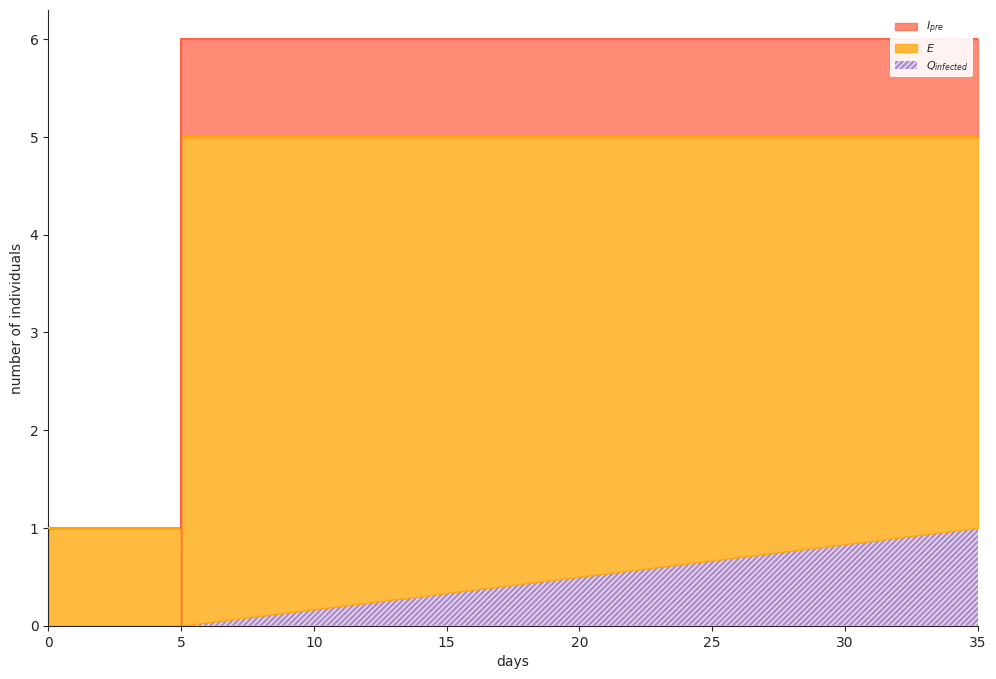

(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot: xlabel='days', ylabel='number of individuals'>)

In [56]:
sim_correlated.model.figure_infections(plot_percentages=False)

In [57]:
sim_correlated.model.tseries

array([0.00000000e+00, 1.00000000e-02, 2.00000000e-02, 3.00000000e-02,
       4.00000000e-02, 5.00000000e-02, 6.00000000e-02, 7.00000000e-02,
       8.00000000e-02, 9.00000000e-02, 1.00000000e-01, 1.10000000e-01,
       1.20000000e-01, 1.30000000e-01, 1.40000000e-01, 1.50000000e-01,
       1.60000000e-01, 1.70000000e-01, 1.80000000e-01, 1.90000000e-01,
       2.00000000e-01, 2.10000000e-01, 2.20000000e-01, 2.30000000e-01,
       2.40000000e-01, 2.50000000e-01, 2.60000000e-01, 2.70000000e-01,
       2.80000000e-01, 2.90000000e-01, 3.00000000e-01, 3.10000000e-01,
       3.20000000e-01, 3.30000000e-01, 3.40000000e-01, 3.50000000e-01,
       3.60000000e-01, 3.70000000e-01, 3.80000000e-01, 3.90000000e-01,
       4.00000000e-01, 4.10000000e-01, 4.20000000e-01, 4.30000000e-01,
       4.40000000e-01, 4.50000000e-01, 4.60000000e-01, 4.70000000e-01,
       4.80000000e-01, 4.90000000e-01, 5.00000000e-01, 5.10000000e-01,
       5.20000000e-01, 5.30000000e-01, 5.40000000e-01, 5.50000000e-01,
      